# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/hidehiro/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

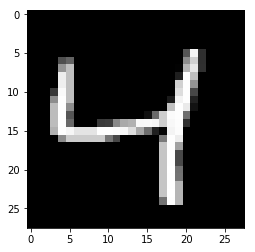

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [4]:
img.shape

(784,)

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [21]:
inputs2 = tf.placeholder(tf.float32, (None, 3), name='inputs')
print(inputs_, inputs2)

Tensor("inputs_2:0", shape=(?, 784), dtype=float32) Tensor("inputs_6:0", shape=(?, 3), dtype=float32)


## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [28]:
mnist.train.next_batch(2)[0].shape

(2, 784)

In [12]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6946
Epoch: 1/20... Training loss: 0.6918
Epoch: 1/20... Training loss: 0.6888
Epoch: 1/20... Training loss: 0.6858
Epoch: 1/20... Training loss: 0.6821
Epoch: 1/20... Training loss: 0.6779
Epoch: 1/20... Training loss: 0.6721
Epoch: 1/20... Training loss: 0.6645
Epoch: 1/20... Training loss: 0.6569
Epoch: 1/20... Training loss: 0.6489
Epoch: 1/20... Training loss: 0.6378
Epoch: 1/20... Training loss: 0.6252
Epoch: 1/20... Training loss: 0.6125
Epoch: 1/20... Training loss: 0.5971
Epoch: 1/20... Training loss: 0.5811
Epoch: 1/20... Training loss: 0.5650
Epoch: 1/20... Training loss: 0.5474
Epoch: 1/20... Training loss: 0.5296
Epoch: 1/20... Training loss: 0.5112
Epoch: 1/20... Training loss: 0.4968
Epoch: 1/20... Training loss: 0.4774
Epoch: 1/20... Training loss: 0.4612
Epoch: 1/20... Training loss: 0.4415
Epoch: 1/20... Training loss: 0.4245
Epoch: 1/20... Training loss: 0.4091
Epoch: 1/20... Training loss: 0.4081
Epoch: 1/20... Training loss: 0.3844
E

Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1994
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1896
E

Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1656
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1645
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1617
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1607
E

Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1407
E

Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1312
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1300
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1268
E

Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1143
E

Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1060
E

Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1118
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1020
E

Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1036
E

Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1002
E

Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0944
E

Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0918
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0961
E

Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0893
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0879
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0880
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0884
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0981
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

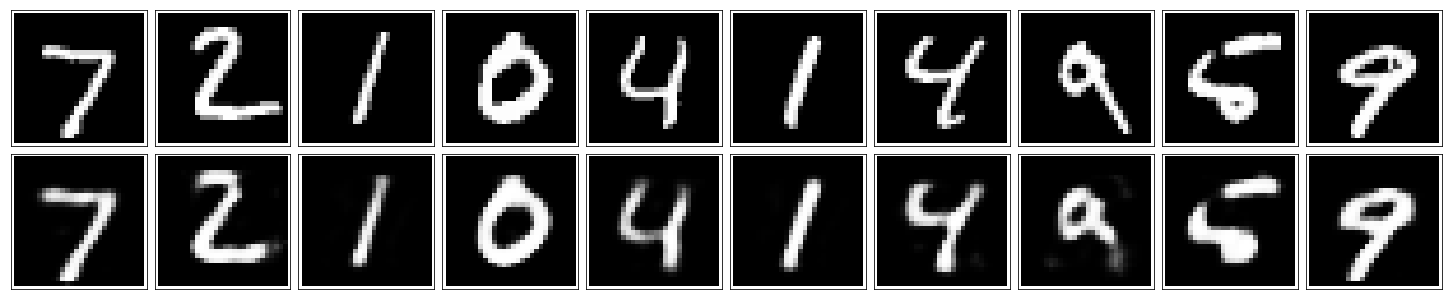

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [14]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.